# Introduction/Business Problem

### The year 2020 has been announced as tourism year for Nepal. It has started tourism campaign VisitNepal2020. The Government of Nepal has been working and encourages every citizen to promote the campaign. The objective of this campaign is to promote Nepal's culture, traditions and natural beauty to the world by calling foreign visitors to explore Nepal. 

### Nepal is known for one of the best valued destinations in the world. It is landlocked country and Kathmandu is the capital city. Its natural beauty, spectacular Himalayan ranges and diversified culture and traditions are obvious reasons that has been making this small beautiful country been visited by many foreigners. Nepal is land of Mount Everest, highest mountain peak of the world. The people from different countries visits here to explore and climb the mountains. Nepal is rich in cultural heritages and has many ancient temples and monasteries. There are 7 UNESCO World Heritage sites including Bhaktapur Durbar Square and Lumbini, birthplace of Gautam Buddha. Nepal boasts a wide range of animals and plants, some found just in Nepal. Nepal has 852 species of birds and bird watching has evolved into a sought-out activity of tourists. Nepal also homes several endangered species such as the Bengal Tiger, One Horned Rhinoceros, Bengal Fox, Red Panda and the elusive Snow Leopard. Nepal is also the best place for recreational activities and water sports like rafting, bungy jumping, rock climbing, paragliding, hiking and camping. Pokhara and Kathmandu are one of the best places in Nepal where many tourists visits and can enjoy different recreational activities. Pokhara lies in Western part of Nepal and takes 25 minutes of air travel from the capital, Kathmandu. The place is also hub for hiking and mountain climbing. In Pokhara and Kathmandu, the visitors will see many restaurants and hotels offering wide range of services. Eatery is also the main business of this place and there are large numbers of it providing local Nepali food, continental, Japanese, Indian, Thailand, Chinese and different cuisines. Nepali dishes are unique itself as it comes with different side dishes. Here in this project, I am focusing on eateries in Kathmandu. What if the tourists love to visit the restaurants that serves Chinese food?

### The problem here I am presenting is that many tourists might want to have Chinese food during their visit in Kathmandu. This project will to find restaurants in Kathmandu that serves Chinese food by using location data.



# Data

## Here I have used location data from Foursquare. I retrieved location data of the restuarants of Kathmandu that serves mainly Chinese food. These data will be enough to provide the solution to the given problem. 

### Here I imported necessary libraries.

In [6]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: - 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Solving environment: | 
  - anaconda::ca-certificates-2019.8.28-0, anaconda::openssl-1.1.1d-h1de35cc_2
  - anaconda::openssl-1.1.1d-h1de35cc_2, defaults::ca-certificates-2019.8.28-0
  - anaconda::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35cc_2
  - defaults::ca-certificates-2019.8.28-0, defaults::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Folium installed
Libraries imported.


### I provided my Foursquare credentials. 

In [7]:
CLIENT_ID = 'IBOUQLHOHPHNQO0PK2D0UTM2WDZALL5V3Y233CMZJDKBVD5U' # your Foursquare ID
CLIENT_SECRET = 'SWU5Y51BPUDKKI5NWCVR31OVDBNZUECAJHKAC5XPK3ZWWJTW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IBOUQLHOHPHNQO0PK2D0UTM2WDZALL5V3Y233CMZJDKBVD5U
CLIENT_SECRET:SWU5Y51BPUDKKI5NWCVR31OVDBNZUECAJHKAC5XPK3ZWWJTW


### The goal of the project is to find the restaurants that serves mainly Chinese food in Kathmandu. The conversion of address of place to latitude and longitude will provide specific data. The place "Thamel" is chosen because it lies in heart of Kathmandu city and hottest spot for tourism.

In [36]:
address = 'Thamel, Nepal'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

27.717028 85.311256


### Here, searching Chinese food serving restaurants in Kathmandu

In [37]:
search_query = 'Chinese food'
radius = 1000
print(search_query + ' .... OK!')

Chinese food .... OK!


### Defining the corresponding URL

In [38]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IBOUQLHOHPHNQO0PK2D0UTM2WDZALL5V3Y233CMZJDKBVD5U&client_secret=SWU5Y51BPUDKKI5NWCVR31OVDBNZUECAJHKAC5XPK3ZWWJTW&ll=27.717028,85.311256&v=20180605&query=Chinese food&radius=1000&limit=100'

### Sending the get request and examining the results

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1b230c9388d7001b95d621'},
 'response': {'venues': [{'id': '5a5615c21b0ea539aaf508db',
    'name': 'Nepal Go - Special Chinese Food',
    'location': {'address': 'Jyatha',
     'lat': 27.712069,
     'lng': 85.31205,
     'labeledLatLngs': [{'label': 'display',
       'lat': 27.712069,
       'lng': 85.31205}],
     'distance': 557,
     'postalCode': '44600',
     'cc': 'NP',
     'city': 'Kathmandu',
     'state': 'Central Development Region',
     'country': 'नेपाल',
     'formattedAddress': ['Jyatha', 'Kathmandu 44600', 'नेपाल']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1578836800',
    'hasPerk': False},
   {'id': '4da5b2b093a01f42facba8ed',
    'name': 'Mc. Donal Fast Food 

### We get dataframe listed with eateries serving Chinese food and its metadata. 

In [40]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,5a5615c21b0ea539aaf508db,Nepal Go - Special Chinese Food,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1578836800,False,Jyatha,27.712069,85.312050,"[{'label': 'display', 'lat': 27.712069, 'lng':...",557,44600,NP,Kathmandu,Central Development Region,नेपाल,"[Jyatha, Kathmandu 44600, नेपाल]",NaN
1,4da5b2b093a01f42facba8ed,Mc. Donal Fast Food Tandoori Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1578836800,False,Thamel,27.717104,85.311983,"[{'label': 'display', 'lat': 27.71710408967273...",72,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Thamel, काठमाडौं, नेपाल]",NaN
2,4c3976486ec69c741bf404a9,Food Bazar,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1578836800,False,Thamel,27.714889,85.310314,"[{'label': 'display', 'lat': 27.71488887276255...",255,NP,NP,काठमाडौं,Central Region,नेपाल,"[Thamel (Chakshibari Marg), काठमाडौं NP, नेपाल]",Chakshibari Marg
3,56c71e77498e6709ed27efbe,Ocean fast food & cafe,"[{'id': '52e81612bcbc57f1066b79fb', 'name': 'H...",v-1578836800,False,NaN,27.717673,85.311245,"[{'label': 'display', 'lat': 27.717673, 'lng':...",71,NaN,NP,NaN,NaN,नेपाल,[नेपाल],NaN
4,537f2e7a498ebe93301f6199,Kathmandu Chinese Mee,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1578836800,False,Thamel,27.712877,85.311438,"[{'label': 'display', 'lat': 27.71287725424161...",462,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Thamel, काठमाडौं, नेपाल]",NaN


### Essential information is selected and filtered dataframe is created.

In [41]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Nepal Go - Special Chinese Food,Chinese Restaurant,Jyatha,27.712069,85.312050,"[{'label': 'display', 'lat': 27.712069, 'lng':...",557,44600,NP,Kathmandu,Central Development Region,नेपाल,"[Jyatha, Kathmandu 44600, नेपाल]",NaN,5a5615c21b0ea539aaf508db
1,Mc. Donal Fast Food Tandoori Restaurant,Restaurant,Thamel,27.717104,85.311983,"[{'label': 'display', 'lat': 27.71710408967273...",72,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Thamel, काठमाडौं, नेपाल]",NaN,4da5b2b093a01f42facba8ed
2,Food Bazar,Coffee Shop,Thamel,27.714889,85.310314,"[{'label': 'display', 'lat': 27.71488887276255...",255,NP,NP,काठमाडौं,Central Region,नेपाल,"[Thamel (Chakshibari Marg), काठमाडौं NP, नेपाल]",Chakshibari Marg,4c3976486ec69c741bf404a9
3,Ocean fast food & cafe,Himalayan Restaurant,NaN,27.717673,85.311245,"[{'label': 'display', 'lat': 27.717673, 'lng':...",71,NaN,NP,NaN,NaN,नेपाल,[नेपाल],NaN,56c71e77498e6709ed27efbe
4,Kathmandu Chinese Mee,Chinese Restaurant,Thamel,27.712877,85.311438,"[{'label': 'display', 'lat': 27.71287725424161...",462,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Thamel, काठमाडौं, नेपाल]",NaN,537f2e7a498ebe93301f6199
5,Chinese noodle shop / 中华面馆,Theme Restaurant,NaN,27.712881,85.311400,"[{'label': 'display', 'lat': 27.712881, 'lng':...",461,NaN,NP,NaN,NaN,नेपाल,[नेपाल],NaN,5853819803cf255eb30375e1
6,Chinese Friendship Restaurant,Chinese Restaurant,Durbarmarg,27.712516,85.318006,"[{'label': 'display', 'lat': 27.71251600723441...",833,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Durbarmarg, काठमाडौं, नेपाल]",NaN,50e3f741e4b0b92a498527f7
7,Chinese Restaurant,Asian Restaurant,Jyatha,27.711601,85.312226,"[{'label': 'display', 'lat': 27.71160097208250...",611,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Jyatha, काठमाडौं, नेपाल]",NaN,54198c99498e9b142b5934e1
8,Chinese Sumai Cafe,Asian Restaurant,NaN,27.706059,85.309706,"[{'label': 'display', 'lat': 27.70605859814724...",1230,NaN,NP,NaN,NaN,नेपाल,[नेपाल],NaN,530359b6498ebaab58ded635
9,Coffee And Vegetarian Food Home,Vegetarian / Vegan Restaurant,NaN,27.717806,85.309140,"[{'label': 'display', 'lat': 27.717806, 'lng':...",225,44600,NP,Kathmandu,Central Development Region,नेपाल,"[Kathmandu 44600, नेपाल]",NaN,5a0da03c5ba046656314e686


In [14]:
dataframe_filtered.name

0                     Nepal Go - Special Chinese Food
1                          R.S. Chinese Food Services
2                             Chinese Stick Food Cafe
3                       Chinese Friendship Restaurant
4                                     Chinese Embassy
5                                    Chinese charming
6                 Zhongguo Flavour Chinese Restaurant
7                                  Chinese Restaurant
8                  Garden Park Fast Food & Restaurant
9                          Chinese noodle shop / 中华面馆
10                                 Chinese Sumai Cafe
11                              Kathmandu Chinese Mee
12        Nepal-Chinese Educational & Cultural Center
13                                      Food Junction
14                                Brother's Fast Food
15                                Nanglo Chinese Room
16                             Centre Point Food Cafe
17                                     Wifi Food Cafe
18          the hygienic pan

### Visualization of data of eateries that serves Chinese food in Kathmandu

In [57]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# Chinese restaurants as crimson circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='crimson',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Methodology

#### short summary of data

In [43]:
dataframe_filtered.describe()

,lat,lng,distance
count,28.000000,28.000000,28.000000
mean,27.713657,85.311673,514.750000
std,0.002937,0.003037,262.444439
min,27.706059,85.305542,71.000000
25%,27.711855,85.310175,332.500000
50%,27.713017,85.311323,509.500000
75%,27.716248,85.312815,621.250000
max,27.718459,85.318006,1230.000000


#### importing matplotlib and associated plotting modules

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


In [53]:
dataframe_filtered.sort_values(['address'], axis = 0, ascending=True, inplace = True )

df_main = dataframe_filtered.head() 
df_main

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
11,Lumbini Fresh Food And Juice Corner,Juice Bar,"Amrit Marg, Kathmandu 44600, Nepal",27.715994,85.312961,"[{'label': 'display', 'lat': 27.715994, 'lng':...",203,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Amrit Marg, Kathmandu 44600, Nepal, काठमाडौं,...",NaN,5aef17df67e5f2002c086423
24,Vootoo,Asian Restaurant,Ananda Bhawan,27.718459,85.317677,"[{'label': 'display', 'lat': 27.71845860133277...",652,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Ananda Bhawan (Lazimpat), काठमाडौं, नेपाल]",Lazimpat,4edf431077c8c05f362e2317
26,Royal Dragon Chinese Restaurant,Chinese Restaurant,Durbar Marg,27.711904,85.317471,"[{'label': 'display', 'lat': 27.71190366693153...",836,NaN,NP,NaN,NaN,नेपाल,"[Durbar Marg, नेपाल]",NaN,51729f17e4b0cb9cb448aae4
6,Chinese Friendship Restaurant,Chinese Restaurant,Durbarmarg,27.712516,85.318006,"[{'label': 'display', 'lat': 27.71251600723441...",833,NaN,NP,काठमाडौं,Central Region,नेपाल,"[Durbarmarg, काठमाडौं, नेपाल]",NaN,50e3f741e4b0b92a498527f7
20,Sunflower Fast Food Restaurant,Restaurant,J P Marg,27.711776,85.309984,"[{'label': 'display', 'lat': 27.711776, 'lng':...",597,44600,NP,カトマンズ,バグマティ,नेपाल,"[J P Marg, カトマンズ 44600, नेपाल]",NaN,5b98b968c365880039150ec5


#### Visualizing the Chinese restuarants based on its distance from Thamel

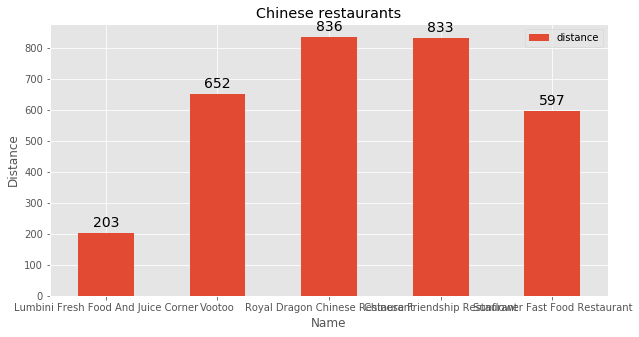

In [56]:
df_tt = df_main[['name','distance']]

df_tt.set_index('name',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 5), rot=0)

ax.set_ylabel('Distance') # add to x-label to the plot
ax.set_xlabel('Name') # add y-label to the plot
ax.set_title('Chinese restaurants') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

# Results and Discussions 

### The main objective of this project is to find out the eateries that serves Chinese cuisines. The project has used the location data from Foursquare. This will help to identify Chinese restaurants in Kathmandu where the visitors may find difficulty to find eateries that serves authentic Chinese food in such busiest and crowded city of Nepal; Kathmandu. In Kathmandu, especially in Thamel areas, the visitors can get into many local food serving restaurants with continental and other varieties of cuisines. The year 2020 is declared as tourism year by Nepal. What if the tourists during their stay in Kathmandu like to have Chinese food? How far are the Chinese restaurants from Thamel, a tourist’s hub in Kathmandu? This project provides solution and information of the restaurants serving Chinese food


# Conclusion

### This project will help the tourists to explore about Chinese cuisine in Kathmandu, Nepal. Although Nepal is full of its own unique culture, traditions, dress and foods it is very interesting to know that there are many such restaurants in the city which serves cuisines of different places of the world. 